# Objective

To identify those columns (or features) which can help us identify new applicants whose chances of default are very high. Using this knowledge, we can give recommendations to investors which applicants to provide loan and which one to be careful.

Our target column is 'loan_status' and we are only interested in 2 type of customers whose status are either 'Fully Paid' or 'Charged Off' (defaulters)

# Imports

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

# Loading Data

In [622]:
original_data = pd.read_csv(r"E:\User\Anirudh Jayant\Coding Study\UpGrad Course\Course 2 -  Statistics Essentials\Case Study - M1 - Lending case\loan.csv",  low_memory=False)

In [623]:
# Creating a deep copy of the data for doing any modification so that if anything goes wrong, we can recover the original data from here.
data = copy.deepcopy(original_data)

# Data Understanding

In [624]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [625]:
data.shape

(39717, 111)

In [626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [627]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


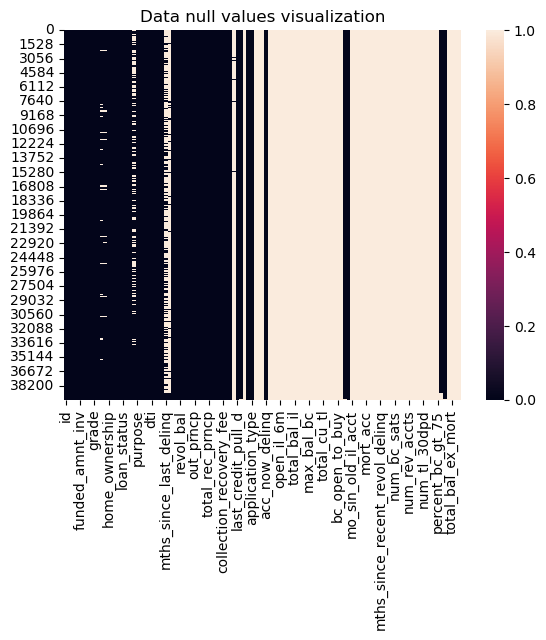

In [628]:
# Visualizing null values
sns.heatmap(data.isnull())
plt.title('Data null values visualization')
plt.show()

In [629]:
# Saving the count of null values for each column is a dictionary so that we can see all the values. Also, sorted them in descending order for better understanding.
null_data_dict = dict(data.isnull().sum().sort_values(ascending=False))
null_data_dict

{'verification_status_joint': 39717,
 'annual_inc_joint': 39717,
 'mo_sin_old_rev_tl_op': 39717,
 'mo_sin_old_il_acct': 39717,
 'bc_util': 39717,
 'bc_open_to_buy': 39717,
 'avg_cur_bal': 39717,
 'acc_open_past_24mths': 39717,
 'inq_last_12m': 39717,
 'total_cu_tl': 39717,
 'inq_fi': 39717,
 'total_rev_hi_lim': 39717,
 'all_util': 39717,
 'max_bal_bc': 39717,
 'open_rv_24m': 39717,
 'open_rv_12m': 39717,
 'il_util': 39717,
 'total_bal_il': 39717,
 'mths_since_rcnt_il': 39717,
 'open_il_24m': 39717,
 'open_il_12m': 39717,
 'open_il_6m': 39717,
 'open_acc_6m': 39717,
 'tot_cur_bal': 39717,
 'tot_coll_amt': 39717,
 'mo_sin_rcnt_rev_tl_op': 39717,
 'mo_sin_rcnt_tl': 39717,
 'mort_acc': 39717,
 'num_rev_tl_bal_gt_0': 39717,
 'total_bc_limit': 39717,
 'total_bal_ex_mort': 39717,
 'tot_hi_cred_lim': 39717,
 'percent_bc_gt_75': 39717,
 'pct_tl_nvr_dlq': 39717,
 'num_tl_op_past_12m': 39717,
 'num_tl_90g_dpd_24m': 39717,
 'num_tl_30dpd': 39717,
 'num_tl_120dpd_2m': 39717,
 'num_sats': 39717,
 'n

## Findings

1. From 'head()', we can have a glimpse of the data.
2. From 'shape', we can see that there are 39717 rows & 111 columns
3. From 'info()', we can see that there are 3 types of columns with their frequency
    -> float64 - 74
    -> int64   - 13
    -> object  - 24
4. From 'describe()', we can analyse outliers by looking at 'mean' & 'std' values. It also verifies that '24' columns are of object type (categorical) as describe only showing '87' columns
5. From heatmap & null_data_dict', we can see that there are several columns in which all the values are null.

# Data Cleaning

## Removing unnecessary columns & rows

Here, we 'll remove those columns & rows which are not going to be useful for our objective

### Removing rows with 'loan_status' = 'Current'

In [630]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

There are 1140 records that need to be removed

In [631]:
data = data[~(data['loan_status']=='Current')]

In [632]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Removing columns in which all the values are null

In [634]:
data.shape

(38577, 111)

In [635]:
# Extracting columns where all the values are null
columns_with_all_the_null_values = data.isnull().sum()[data.isnull().sum() == 38577]
columns_with_all_the_null_values

next_pymnt_d                      38577
mths_since_last_major_derog       38577
annual_inc_joint                  38577
dti_joint                         38577
verification_status_joint         38577
tot_coll_amt                      38577
tot_cur_bal                       38577
open_acc_6m                       38577
open_il_6m                        38577
open_il_12m                       38577
open_il_24m                       38577
mths_since_rcnt_il                38577
total_bal_il                      38577
il_util                           38577
open_rv_12m                       38577
open_rv_24m                       38577
max_bal_bc                        38577
all_util                          38577
total_rev_hi_lim                  38577
inq_fi                            38577
total_cu_tl                       38577
inq_last_12m                      38577
acc_open_past_24mths              38577
avg_cur_bal                       38577
bc_open_to_buy                    38577


In [636]:
# No. of columns with all the values are null
columns_with_all_the_null_values.count()

55

So, there are 55 such columns where all values are null. let's remove them.

In [637]:
# Dropping those columns where all the values in a column are null
data.dropna(axis=1, how='all',inplace=True)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### Removing columns in which there are more than 50% null values

In [638]:
# Extracting columns where no. of null values != 0 in descending order
data.isnull().sum()[data.isnull().sum() != 0].sort_values(ascending=False)

mths_since_last_record        35837
mths_since_last_delinq        24905
desc                          12527
emp_title                      2386
emp_length                     1033
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
dtype: int64

In [639]:
# Extract columns where there are more than 50% null values
(data.isnull().mean()*100)[data.isnull().mean()*100 >50.00].sort_values(ascending=False)

mths_since_last_record    92.897322
mths_since_last_delinq    64.559193
dtype: float64

From above, we can infer that we should drop 'mths_since_last_record' & 'mths_since_last_delinq'

In [640]:
# Dropping above mentioned columns
columns_to_be_dropped = ['mths_since_last_record', 'mths_since_last_delinq']
data.drop(columns_to_be_dropped, axis=1, inplace=True)
data.isnull().sum()[data.isnull().sum() != 0].sort_values(ascending=False)

desc                          12527
emp_title                      2386
emp_length                     1033
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
dtype: int64

In [641]:
data.shape

(38577, 54)

### Removing columns with only 1 unique value

As these columns won't add any value to our analysis

In [642]:
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
out_prncp                         1
collections_12_mths_ex_med        1
out_prncp_inv                     1
pymnt_plan                        1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

In [643]:
single_value_columns = list(data.columns[data.nunique() == 1])
single_value_columns

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [644]:
len(single_value_columns)

11

So, there are 11 such columns which we can drop.

In [645]:
data.drop(single_value_columns, inplace=True, axis=1)
data.shape

(38577, 43)

### Removing irrelevant columns

In [646]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Now, we 'll try to remove those columns which are either 'll not give any useful information or not useful for our objective.

As per our objective, we need to remove those columns which are generated after loan is given to the applicant because our goal is to analyse a new applicant so that we can decide whether a loan should be given to him or not for which we 'll not be having those columns.

Let's analyse 10 columns at once and whenever we find any irrelevant column we 'll add it to 'irrelevant_cols' list.

In [647]:
irrelevant_cols = []

#### Analysing 0-10 columns

In [648]:
data.columns[:10]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')

Columns to be removed because either they are created after loan is approved or they are not available when loan application is received or they are irrelevant (repetitive or not useful) :

'id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'sub_grade'

So, let's add these columns to our list.

In [649]:
irrelevant_cols = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'sub_grade']

#### Analysing 10-20 columns

In [650]:
data.columns[10:20]

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'url', 'desc',
       'purpose'],
      dtype='object')

Columns to be removed because either they are created after loan is approved or they are not available when loan application is received or they are irrelevant (repetitive or not useful) :

'emp_title', 'url', 'desc'

So, let's add these columns to our list.

In [651]:
temp = ['emp_title', 'url', 'desc']
irrelevant_cols.extend(temp)
irrelevant_cols

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'sub_grade',
 'emp_title',
 'url',
 'desc']

In [653]:
# No. of columns
len(irrelevant_cols)

9

#### Analysing 20-30 columns

In [654]:
data.columns[20:30]

Index(['title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal'],
      dtype='object')

Columns to be removed because either they are created after loan is approved or they are not available when loan application is received or they are irrelevant (repetitive or not useful) :

'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line','pub_rec', 'revol_bal'

So, let's add these columns to our list.

In [655]:
temp = ['zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'pub_rec', 'revol_bal']
irrelevant_cols.extend(temp)
irrelevant_cols

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'sub_grade',
 'emp_title',
 'url',
 'desc',
 'zip_code',
 'addr_state',
 'delinq_2yrs',
 'earliest_cr_line',
 'pub_rec',
 'revol_bal']

In [656]:
# No. of columns
len(irrelevant_cols)

15

#### Analysing remaining columns

In [657]:
data.columns[30:]

Index(['revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Columns to be removed because either they are created after loan is approved or they are not available when loan application is received or they are irrelevant (repetitive or not useful) : 

'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'

So, let's add these columns to our list.

In [658]:
temp = ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',  'pub_rec_bankruptcies']
irrelevant_cols.extend(temp)
irrelevant_cols

['id',
 'member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'sub_grade',
 'emp_title',
 'url',
 'desc',
 'zip_code',
 'addr_state',
 'delinq_2yrs',
 'earliest_cr_line',
 'pub_rec',
 'revol_bal',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [659]:
# No. of columns
len(irrelevant_cols)

26

#### Removing above selected columns

In [660]:
# Just for safety, lets keep 'data' untouched and save the data after removing columns in a new df
relevant_data = data.drop(irrelevant_cols, axis=1)
relevant_data

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,inq_last_6mths,open_acc,revol_util,total_acc
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,1,3,83.70%,9
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,5,3,9.40%,4
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,2,2,98.50%,10
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,1,10,21%,37
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,3,9,28.30%,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,11.33,0,13,13.10%,40
39713,8500,36 months,10.28%,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,6.40,1,6,26.90%,9
39714,5000,36 months,8.07%,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,2.30,0,11,19.40%,20
39715,5000,36 months,7.43%,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,3.72,0,17,0.70%,26


In [661]:
relevant_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'inq_last_6mths', 'open_acc',
       'revol_util', 'total_acc'],
      dtype='object')

#### Title vs Purpose

Purpose: A category provided by the borrower for the loan request. 
Title: The loan title provided by the borrower

These two columns seems to have same kind of information. Let's see some of the data

In [662]:
relevant_data[['title','purpose']].head(20)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other
10,High intrest Consolidation,debt_consolidation


In [663]:
relevant_data['title'].isnull().sum()

11

In [664]:
relevant_data['purpose'].isnull().sum()

0

Since, they both have same kind of data and 'purpose' column have 0 null values. Therefore, we can drop 'title' column and keep 'purpose' column.

In [665]:
relevant_data.drop('title', axis=1, inplace=True)
relevant_data.shape

(38577, 16)

In [666]:
relevant_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,9,28.30%,12


### Handling missing values

In [667]:
# count of missing values
relevant_data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_util               50
total_acc                 0
dtype: int64

In [668]:
# % of missing values
relevant_data.isnull().mean()*100

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
grade                  0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### emp_length

In [669]:
relevant_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [670]:
emp_length_mode = relevant_data['emp_length'].mode()[0]
emp_length_mode

'10+ years'

Considering, 
1. Missing values is only approx 2.5% 
2. Mode value has very high frequency as compare to other values in the columns.
3. By dropping rows, we might loose important information in other columns.

Therefore, we 'll impute missing values with the mode value

In [671]:
relevant_data['emp_length'].fillna(emp_length_mode, inplace=True)

In [672]:
relevant_data['emp_length'].isnull().sum()

0

#### revol_util

In [673]:
relevant_data['revol_util'].value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

Considering
1. Missing values is 0.1%
2. Too many unique values

Therefore, Dropping such a small no. of rows with null values will not affect our resut

In [674]:
relevant_data.shape

(38577, 16)

In [675]:
relevant_data.dropna(inplace=True)

In [677]:
relevant_data.shape

(38527, 16)

In [678]:
# % of missing values
relevant_data.isnull().mean()*100

loan_amnt              0.0
term                   0.0
int_rate               0.0
grade                  0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
dtype: float64

No null values in the data

## Standardise Values

In [679]:
relevant_data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,9,28.30%,12


In [680]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   term                 38527 non-null  object 
 2   int_rate             38527 non-null  object 
 3   grade                38527 non-null  object 
 4   emp_length           38527 non-null  object 
 5   home_ownership       38527 non-null  object 
 6   annual_inc           38527 non-null  float64
 7   verification_status  38527 non-null  object 
 8   issue_d              38527 non-null  object 
 9   loan_status          38527 non-null  object 
 10  purpose              38527 non-null  object 
 11  dti                  38527 non-null  float64
 12  inq_last_6mths       38527 non-null  int64  
 13  open_acc             38527 non-null  int64  
 14  revol_util           38527 non-null  object 
 15  total_acc            38527 non-null 

From above, we can infer the following:
1. 'int_rate' should be float
2. 'emp_length' should be integer
3. 'issue_d' should be split into 2 columns - 'issue_d_month' & 'issue_d_year'
4. 'loan_status' should be integer as this is our target variable(binary values - 0 (Not a defaulter) & 1 (defaulter))
5. 'revol_util' should be changed to float type

### int_rate

This value should be float type

In [681]:
relevant_data['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [682]:
relevant_data['int_rate_%'] = relevant_data['int_rate'].str.strip().str[:-1].astype(float)
relevant_data.drop('int_rate', axis=1, inplace=True)
relevant_data['int_rate_%']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate_%, Length: 38527, dtype: float64

In [683]:
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,int_rate_%
0,5000,36 months,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9,10.65
1,2500,60 months,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4,15.27
2,2400,36 months,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10,15.96
3,10000,36 months,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37,13.49
5,5000,36 months,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,3,9,28.30%,12,7.90


### emp_length

In [684]:
relevant_data['emp_length'].value_counts()

10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

Assumption: '10+ years' to 10 & '< 1 year' to 0, we 'll convert this to int type

In [685]:
relevant_data['emp_length'] = relevant_data['emp_length'].apply(lambda x: 0 if x.strip() =='< 1 year' else int(''.join(filter(str.isdigit, x.strip()))))
relevant_data['emp_length']

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38527, dtype: int64

In [686]:
relevant_data['emp_length'].value_counts()

10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

### issue_d

In [687]:
relevant_data['issue_d_year'] = pd.to_datetime(relevant_data['issue_d'], format='%b-%y').dt.year
relevant_data['issue_d_month'] = pd.to_datetime(relevant_data['issue_d'], format='%b-%y').dt.month
relevant_data.drop('issue_d', axis=1, inplace=True)
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,int_rate_%,issue_d_year,issue_d_month
0,5000,36 months,B,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,1,3,83.70%,9,10.65,2011,12
1,2500,60 months,C,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,5,3,9.40%,4,15.27,2011,12
2,2400,36 months,C,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,2,98.50%,10,15.96,2011,12
3,10000,36 months,C,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,1,10,21%,37,13.49,2011,12
5,5000,36 months,A,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,3,9,28.30%,12,7.90,2011,12


### loan_status => defaulter

This is our target variable. Since, we only have 2 unique values so we can convert this column to binary 1 (Charged Off) & 0 (Fully Paid) with a new column name 'defaulter'. So, '0' means not a defaulter & '1' means defaulter

In [688]:
relevant_data['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

In [689]:
relevant_data['defaulter'] = relevant_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
relevant_data.drop('loan_status', axis=1, inplace=True)
relevant_data['defaulter']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: defaulter, Length: 38527, dtype: int64

In [691]:
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,int_rate_%,issue_d_year,issue_d_month,defaulter
0,5000,36 months,B,10,RENT,24000.0,Verified,credit_card,27.65,1,3,83.70%,9,10.65,2011,12,0
1,2500,60 months,C,0,RENT,30000.0,Source Verified,car,1.00,5,3,9.40%,4,15.27,2011,12,1
2,2400,36 months,C,10,RENT,12252.0,Not Verified,small_business,8.72,2,2,98.50%,10,15.96,2011,12,0
3,10000,36 months,C,10,RENT,49200.0,Source Verified,other,20.00,1,10,21%,37,13.49,2011,12,0
5,5000,36 months,A,3,RENT,36000.0,Source Verified,wedding,11.20,3,9,28.30%,12,7.90,2011,12,0


### revol_util

In [692]:
relevant_data['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [693]:
relevant_data['revol_util_%'] = relevant_data['revol_util'].astype(str).apply(lambda x: x.strip("%")).astype(float)
relevant_data.drop('revol_util', axis=1, inplace=True)
relevant_data['revol_util_%'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util_%, dtype: float64

In [694]:
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,open_acc,total_acc,int_rate_%,issue_d_year,issue_d_month,defaulter,revol_util_%
0,5000,36 months,B,10,RENT,24000.0,Verified,credit_card,27.65,1,3,9,10.65,2011,12,0,83.7
1,2500,60 months,C,0,RENT,30000.0,Source Verified,car,1.00,5,3,4,15.27,2011,12,1,9.4
2,2400,36 months,C,10,RENT,12252.0,Not Verified,small_business,8.72,2,2,10,15.96,2011,12,0,98.5
3,10000,36 months,C,10,RENT,49200.0,Source Verified,other,20.00,1,10,37,13.49,2011,12,0,21.0
5,5000,36 months,A,3,RENT,36000.0,Source Verified,wedding,11.20,3,9,12,7.90,2011,12,0,28.3


### home_ownership

In [763]:
relevant_data['home_ownership'].value_counts()

RENT        17924
MORTGAGE    15437
OWN          2813
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [ ]:
As we already have 'OTHER', therefore, we can move the change the status of 'NONE' to 'OTHER'

In [765]:
relevant_data['home_ownership'] = relevant_data['home_ownership'].replace('NONE', 'OTHER')
relevant_data['home_ownership'].value_counts()

RENT        17924
MORTGAGE    15437
OWN          2813
OTHER          94
Name: home_ownership, dtype: int64

## Handling outliers

In [695]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   term                 38527 non-null  object 
 2   grade                38527 non-null  object 
 3   emp_length           38527 non-null  int64  
 4   home_ownership       38527 non-null  object 
 5   annual_inc           38527 non-null  float64
 6   verification_status  38527 non-null  object 
 7   purpose              38527 non-null  object 
 8   dti                  38527 non-null  float64
 9   inq_last_6mths       38527 non-null  int64  
 10  open_acc             38527 non-null  int64  
 11  total_acc            38527 non-null  int64  
 12  int_rate_%           38527 non-null  float64
 13  issue_d_year         38527 non-null  int64  
 14  issue_d_month        38527 non-null  int64  
 15  defaulter            38527 non-null 

In [696]:
quantitative_variables = relevant_data.select_dtypes(exclude=['object']).columns
quantitative_variables

Index(['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'total_acc', 'int_rate_%', 'issue_d_year', 'issue_d_month',
       'defaulter', 'revol_util_%'],
      dtype='object')

In [697]:
len(quantitative_variables)

12

So, total we have 12 quantitative variable but 'defaulter' is our target variable and can be considered as categorical variable. So, we 'll do outlier anaylsis for the remaining 11 columns/ variables: 

'loan_amnt', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc', 'int_rate_%', 'issue_d_year', 'issue_d_month', 'revol_util_%'

In [698]:
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,open_acc,total_acc,int_rate_%,issue_d_year,issue_d_month,defaulter,revol_util_%
0,5000,36 months,B,10,RENT,24000.0,Verified,credit_card,27.65,1,3,9,10.65,2011,12,0,83.7
1,2500,60 months,C,0,RENT,30000.0,Source Verified,car,1.00,5,3,4,15.27,2011,12,1,9.4
2,2400,36 months,C,10,RENT,12252.0,Not Verified,small_business,8.72,2,2,10,15.96,2011,12,0,98.5
3,10000,36 months,C,10,RENT,49200.0,Source Verified,other,20.00,1,10,37,13.49,2011,12,0,21.0
5,5000,36 months,A,3,RENT,36000.0,Source Verified,wedding,11.20,3,9,12,7.90,2011,12,0,28.3


### Outliers

#### Outliers - No action required

Becasue the distribution of values is quite even

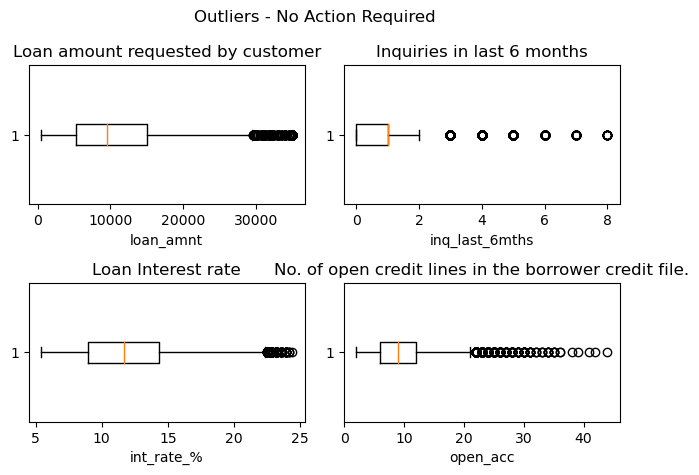

In [699]:
# create a figure with 6 subplots
fig_1, axs_1 = plt.subplots(nrows=2, ncols=2)

# plot data in each subplot
axs_1[0, 0].boxplot(relevant_data['loan_amnt'], vert=False)
axs_1[0, 0].set_title('Loan amount requested by customer')
axs_1[0, 0].set_xlabel('loan_amnt')

axs_1[0, 1].boxplot(relevant_data['inq_last_6mths'], vert=False)
axs_1[0, 1].set_title('Inquiries in last 6 months')
axs_1[0, 1].set_xlabel('inq_last_6mths')

axs_1[1, 0].boxplot(relevant_data['int_rate_%'], vert=False)
axs_1[1, 0].set_title('Loan Interest rate')
axs_1[1, 0].set_xlabel('int_rate_%')

axs_1[1, 1].boxplot(relevant_data['open_acc'], vert=False)
axs_1[1, 1].set_title('No. of open credit lines in the borrower credit file.')
axs_1[1, 1].set_xlabel('open_acc')

# set figure title
fig_1.suptitle('Outliers - No Action Required')

# adjust subplot spacing
plt.tight_layout()

plt.show()

We are not taking any action because the distribution of outliers is very uniform

#### Outliers - Action Required

##### annual_inc

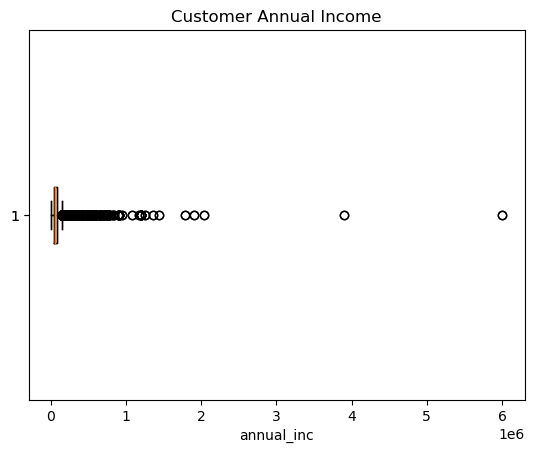

In [701]:
plt.boxplot(relevant_data['annual_inc'], vert=False)
plt.xlabel('annual_inc')
plt.title('Customer Annual Income')
plt.show()

In [702]:
relevant_data['annual_inc'].quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75      82000.0
0.90     115000.0
0.95     140004.0
0.97     165000.0
0.98     187000.0
0.99     234000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

Here, the spread of outliers is not uniform & it disturbs the whole plot as well. So, as per the 3-Sigma rule, we 'll remove any values beyond 95 percentile.

In [703]:
relevant_data.shape

(38527, 17)

In [704]:
annual_inc_95_percentile = np.percentile(relevant_data['annual_inc'], 95)
relevant_data = relevant_data[relevant_data['annual_inc'] <= annual_inc_95_percentile]

In [705]:
relevant_data.shape

(36606, 17)

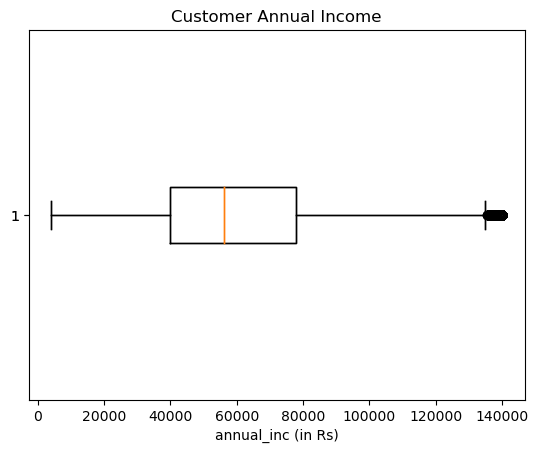

In [707]:
plt.boxplot(relevant_data['annual_inc'], vert=False)
plt.xlabel('annual_inc (in Rs)')
plt.title('Customer Annual Income')
plt.show()

Now, it seems acceptable as all the outliers are spread evenly.

##### total_acc

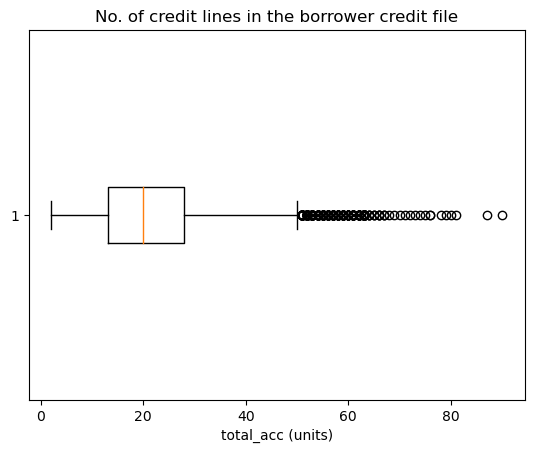

In [708]:
plt.boxplot(relevant_data['total_acc'], vert=False)
plt.xlabel('total_acc (units)')
plt.title('No. of credit lines in the borrower credit file')
plt.show()

In [709]:
relevant_data['total_acc'].quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    28.0
0.90    37.0
0.95    43.0
0.97    47.0
0.98    50.0
0.99    55.0
1.00    90.0
Name: total_acc, dtype: float64

Till 99 percentile, the values are evenly spread. So, let's remove the values beyond that

In [710]:
relevant_data.shape

(36606, 17)

In [711]:
total_acc_99_percentile = np.percentile(relevant_data['total_acc'], 99)
relevant_data = relevant_data[relevant_data['total_acc'] <= total_acc_99_percentile]

In [712]:
relevant_data.shape

(36268, 17)

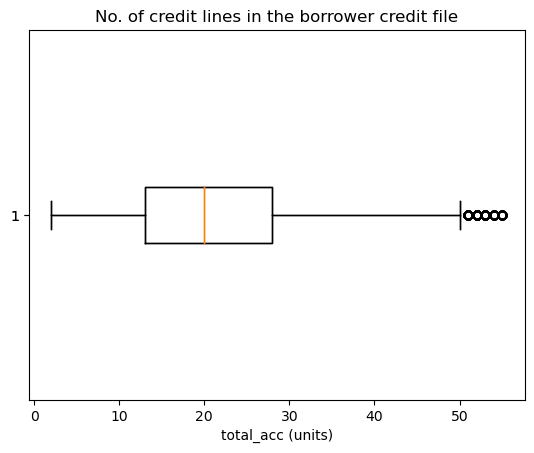

In [714]:
plt.boxplot(relevant_data['total_acc'], vert=False)
plt.xlabel('total_acc (units)')
plt.title('No. of credit lines in the borrower credit file')
plt.show()

This is acceptable now

In [181]:
relevant_data['issue_d_year'].value_counts()

2011    19261
2010    10884
2009     4422
2008     1472
2007      229
Name: issue_d_year, dtype: int64

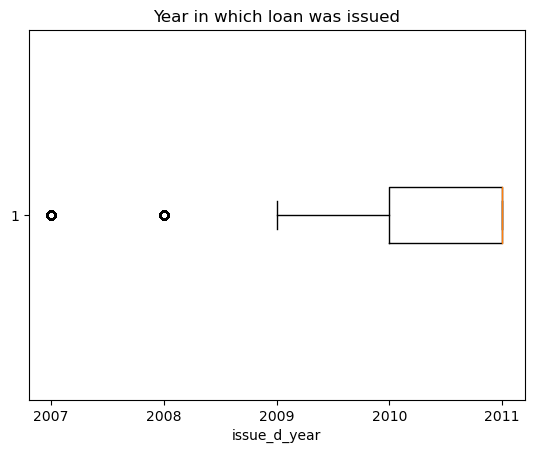

In [185]:
plt.boxplot(relevant_data['issue_d_year'], vert=False)
plt.xlabel('issue_d_year')
plt.title('Year in which loan was issued')
plt.xticks(np.arange(2007,2012,1))
plt.show()

In [186]:
relevant_data['issue_d_year'].quantile([0.75,0.90,0.95,0.97, 0.98, 0.99, 1.0])

0.75    2011.0
0.90    2011.0
0.95    2011.0
0.97    2011.0
0.98    2011.0
0.99    2011.0
1.00    2011.0
Name: issue_d_year, dtype: float64

### No outliers

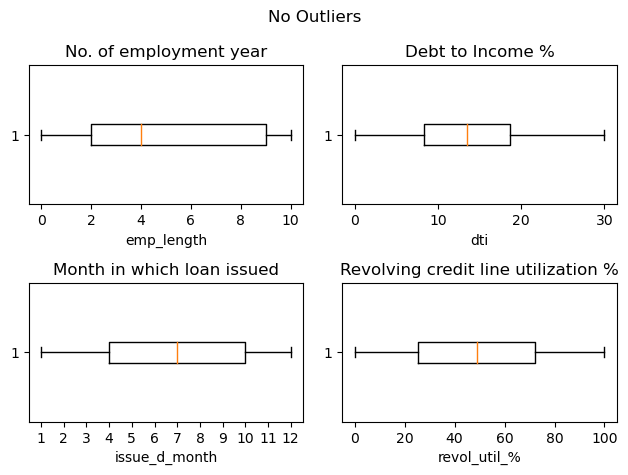

In [715]:
# create a figure with 4 subplots
fig_3, axs_3 = plt.subplots(nrows=2, ncols=2)

# plot data in each subplot
axs_3[0, 0].boxplot(relevant_data['emp_length'], vert=False)
axs_3[0, 0].set_title('No. of employment year')
axs_3[0, 0].set_xlabel('emp_length')

axs_3[0, 1].boxplot(relevant_data['dti'], vert=False)
axs_3[0, 1].set_title('Debt to Income %')
axs_3[0, 1].set_xlabel('dti')

axs_3[1, 0].boxplot(relevant_data['issue_d_month'], vert=False)
axs_3[1, 0].set_title('Month in which loan issued')
axs_3[1, 0].set_xlabel('issue_d_month')
axs_3[1, 0].set_xticks(np.arange(1, 13, 1))
axs_3[1, 0].set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

axs_3[1, 1].boxplot(relevant_data['revol_util_%'], vert=False)
axs_3[1, 1].set_title('Revolving credit line utilization %')
axs_3[1, 1].set_xlabel('revol_util_%')

# set figure title
fig_3.suptitle('No Outliers')

# adjust subplot spacing
plt.tight_layout()

plt.show()

# Data Analysis

In [716]:
relevant_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,open_acc,total_acc,int_rate_%,issue_d_year,issue_d_month,defaulter,revol_util_%
0,5000,36 months,B,10,RENT,24000.0,Verified,credit_card,27.65,1,3,9,10.65,2011,12,0,83.7
1,2500,60 months,C,0,RENT,30000.0,Source Verified,car,1.00,5,3,4,15.27,2011,12,1,9.4
2,2400,36 months,C,10,RENT,12252.0,Not Verified,small_business,8.72,2,2,10,15.96,2011,12,0,98.5
3,10000,36 months,C,10,RENT,49200.0,Source Verified,other,20.00,1,10,37,13.49,2011,12,0,21.0
5,5000,36 months,A,3,RENT,36000.0,Source Verified,wedding,11.20,3,9,12,7.90,2011,12,0,28.3


In [717]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36268 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36268 non-null  int64  
 1   term                 36268 non-null  object 
 2   grade                36268 non-null  object 
 3   emp_length           36268 non-null  int64  
 4   home_ownership       36268 non-null  object 
 5   annual_inc           36268 non-null  float64
 6   verification_status  36268 non-null  object 
 7   purpose              36268 non-null  object 
 8   dti                  36268 non-null  float64
 9   inq_last_6mths       36268 non-null  int64  
 10  open_acc             36268 non-null  int64  
 11  total_acc            36268 non-null  int64  
 12  int_rate_%           36268 non-null  float64
 13  issue_d_year         36268 non-null  int64  
 14  issue_d_month        36268 non-null  int64  
 15  defaulter            36268 non-null 

In [718]:
quantitative_variables = relevant_data.select_dtypes(exclude=['object']).columns
quantitative_variables

Index(['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'total_acc', 'int_rate_%', 'issue_d_year', 'issue_d_month',
       'defaulter', 'revol_util_%'],
      dtype='object')

In [719]:
len(quantitative_variables)

12

In [720]:
categorical_variables = relevant_data.select_dtypes(include=['object']).columns
categorical_variables

Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose'], dtype='object')

In [266]:
len(categorical_variables)

5

Now, by looking at the Dtype & using the knowledge of their no. unique values, we can split these columns in to 2 types for analysis
1. Categorical
    a. Ordered categorical   : grade, 'issue_d_year', 'issue_d_month' (Last two can be better analysed here)
    b. Unordered categorical : term, home_ownership, verification_status, purpose  
        
2. Quantitative : 

'loan_amnt', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc', 'int_rate_%', 'revol_util_%'

Let's analyse some of the variables from each category 

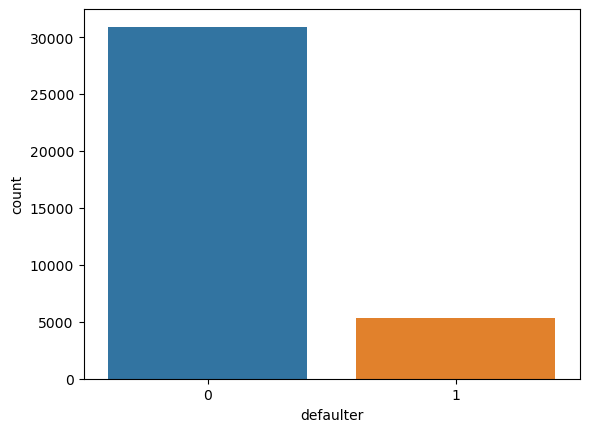

In [721]:
# Let's first analyze our target variable
sns.countplot(x = 'defaulter', data = relevant_data, order = [0,1])
plt.show()

From above, we can infer that majority of the people have paid off their loan.

## Univariate Analysis

In [724]:
relevant_data.shape

(36268, 17)

### Unordered Categorical Variables

#### term

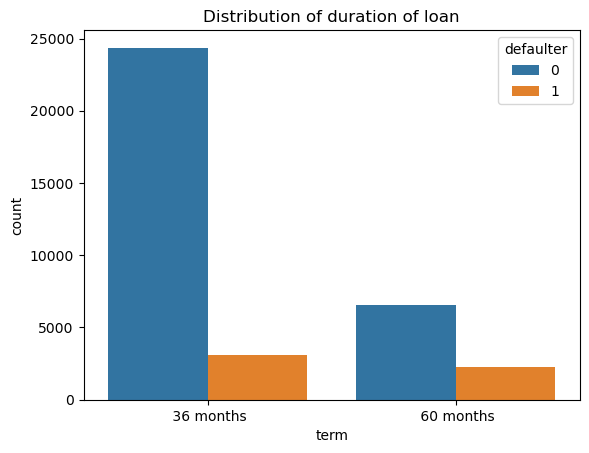

In [768]:
# Count plot
sns.countplot(x ='term', data = relevant_data, hue='defaulter')
plt.title('Distribution of duration of loan')
plt.show()

This indicates that the ratio of defaulters is higher when term = '60 months'

#### home_ownership

In [766]:
relevant_data['home_ownership'].value_counts()

RENT        17924
MORTGAGE    15437
OWN          2813
OTHER          94
Name: home_ownership, dtype: int64

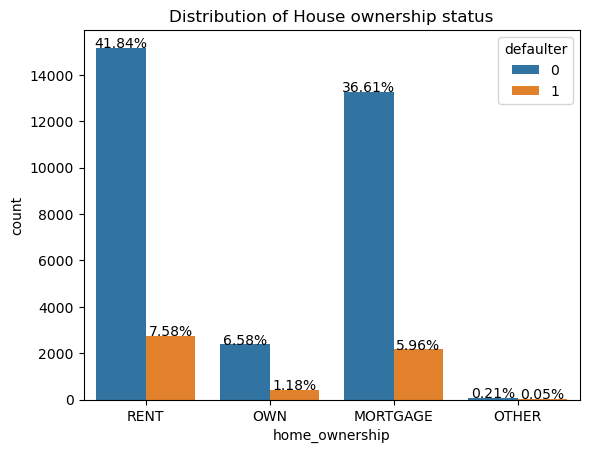

In [769]:
ax = sns.countplot(x = 'home_ownership', data = relevant_data, hue='defaulter')

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of House ownership status')
plt.show()

By plot as well as by calculating the % of default in each category w.r.t total customer in each category, customers with home_ownership as 'OTHER' has maximum chances of default.

Percentage calculation by assuming the percentage given in the plot as numbers: (0.05/(0.05+0.21))*100 = 19% (approx)

#### verification_status

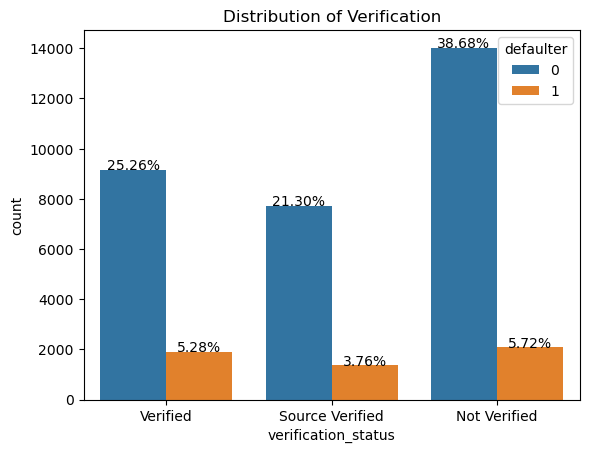

In [770]:
ax = sns.countplot(x = 'verification_status', data = relevant_data, hue='defaulter')

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of Verification')
plt.show()

By plot as well as by by calculating the % of default in each category w.r.t total customer in each category, customers with verification_status as 'Verified' has maximum chances of default.

Percentage calculation by assuming the percentage given in the plot as numbers: (5.28/(5.28+25.26))*100 = 17% (approx)

#### purpose

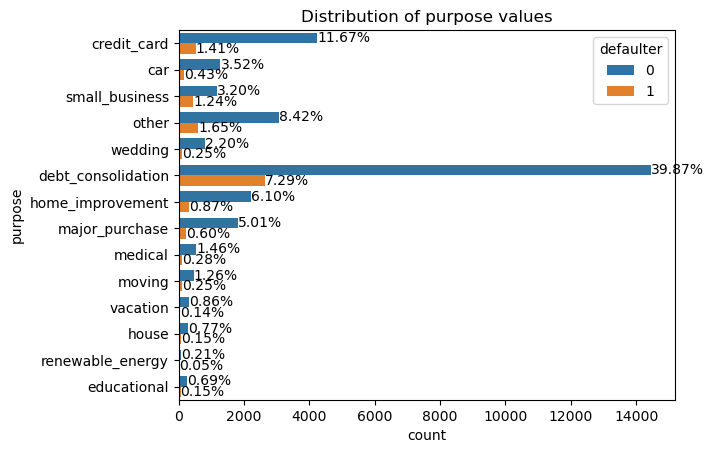

In [776]:
ax = sns.countplot(y = 'purpose', data = relevant_data, hue='defaulter')

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    width = p.get_width()
    ax.text(width+3,
            p.get_y()+p.get_height()/2.,
            '{:.2f}%'.format((width/total)*100),
            va="center")
    
plt.title('Distribution of purpose values')
plt.show()

By plot as well as by by calculating the % of default in each category w.r.t total customer in each category, customers with purpose as 'small_business' has maximum chances of default.

Percentage calculation by assuming the percentage given in the plot as numbers: (1.24/(1.24+3.20))*100 = 28% (approx)

#### Findings:

Based on the above analysis, we can say that the chances of a person defaulting on loan is high when
1. term = ‘60 months’
2. home_ownership = ‘OTHER’
3. verification_status = ‘Verified’
4. purpose = ‘Small_business’

### Ordered Categorical Variables

#### grade

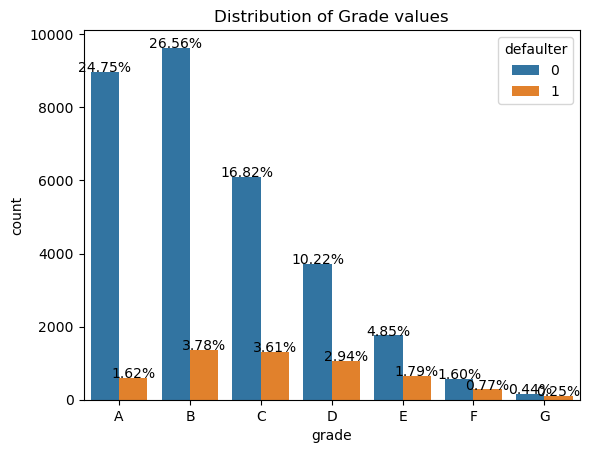

In [779]:
ax = sns.countplot(x = 'grade', data = relevant_data, hue='defaulter', order = ['A','B','C','D','E','F','G'])

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of Grade values')
plt.show()

By plot as well as by by calculating the % of default in each category w.r.t total customer in each category, customers with grade as 'G' has maximum chances of default.

Percentage calculation by assuming the percentage given in the plot as numbers: (0.25/(0.25+0.44))*100 = 36% (approx)

#### issue_d_year

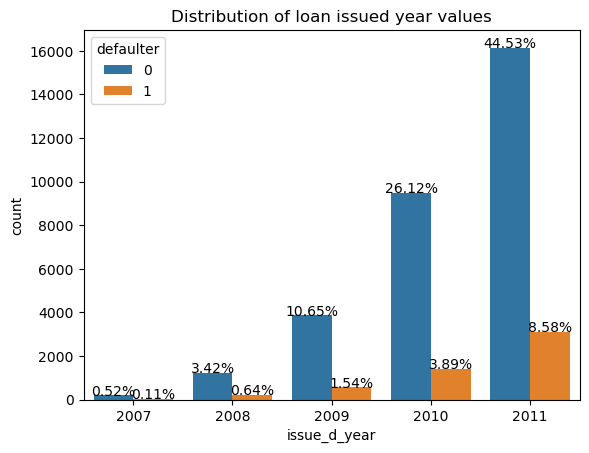

In [780]:
ax = sns.countplot(x = 'issue_d_year', data = relevant_data, hue='defaulter', order =[2007,2008,2009,2010,2011])

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of loan issued year values')
plt.show()

By plot we can shortlist to 3 year - 2007, 2008 & 2011. Let's calculate the % of default in each category w.r.t total customer in each category one-by-one

Percentage calculation by assuming the percentage given in the plot as numbers:

1. For 2007 = (0.11/(0.11+0.52))*100 = 17.46
2. For 2008 = (0.64/(0.64+3.42))*100 = 15.76
3. For 2011 = (8.58/(8.58+44.53))*100 = 16.15

From this, we can say that customers with issue_d_year as '2007' has maximum chances of default.

#### issue_d_month

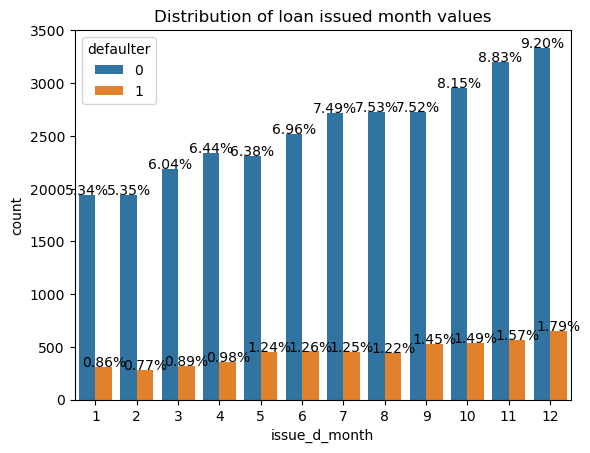

In [781]:
ax = sns.countplot(x = 'issue_d_month', data = relevant_data, hue='defaulter', order = [1,2,3,4,5,6,7,8,9,10,11,12])

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of loan issued month values')
plt.show()

By plot as well as by calculating the % of default in each category w.r.t total customer in each category, customers with isue_d_month as 5 (16.27%) or 12 (16.28) has maximum chances of default as compare to others

#### Findings:

Based on this analysis, we can say that the chances of a person defaulting on loan is high when
1. grade= ‘G’
2. issue_d_year = 2007
3. issue_d_month= 5 or 12

### Quantitative Variable

#### emp_length

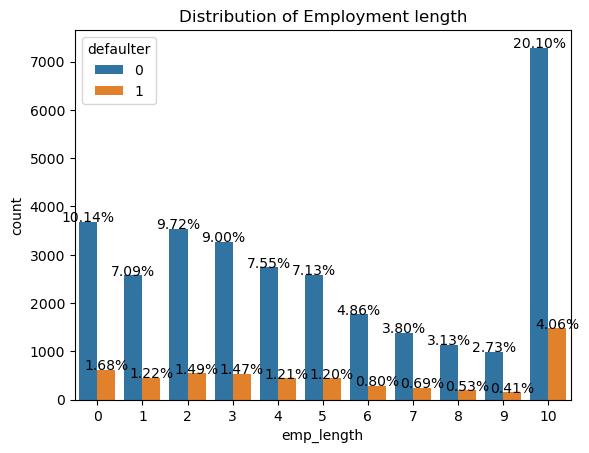

In [783]:
ax = sns.countplot(x = 'emp_length', data = relevant_data, hue='defaulter')

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
    
plt.title('Distribution of Employment length')
plt.show()

By plot as well as by calculating the % of default in each category w.r.t total customer in each category, customers with emp_length as 10 (16.80%) has maximum chances of default as compare to others

#### loan_amnt

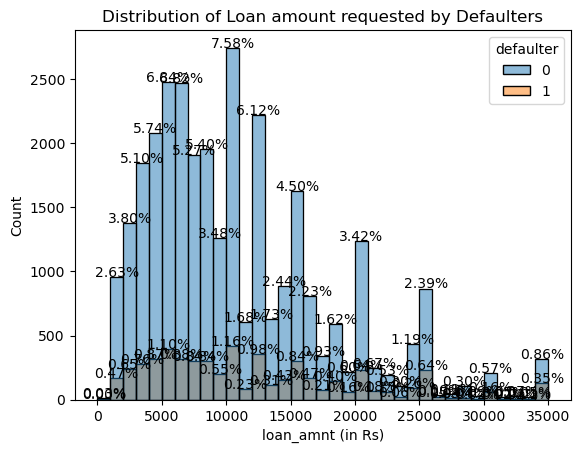

In [799]:
# plot histogram
ax = sns.histplot(x = 'loan_amnt', data = relevant_data, hue= 'defaulter', edgecolor='black', bins=35, binrange=(0,35000))
plt.xlabel('loan_amnt (in Rs)')
plt.ylabel('Count')

total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            ha="center") 

plt.title('Distribution of Loan amount requested by Defaulters')
plt.show()

#### inq_last_6mths

In [464]:
defaulter_relevant_data['inq_last_6mths'].describe()

count    5354.000000
mean        1.053605
std         1.153104
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

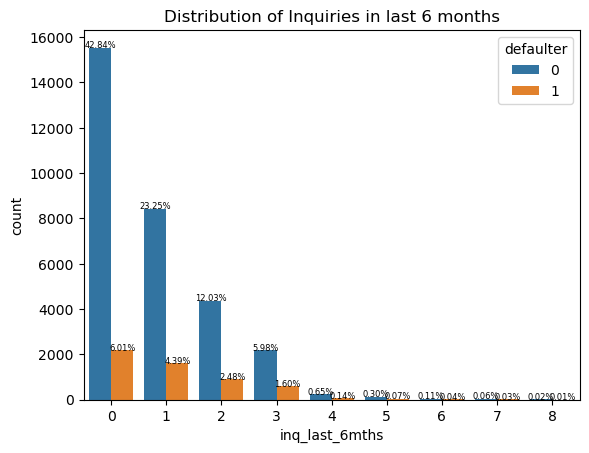

In [802]:
ax = sns.countplot(x = 'inq_last_6mths', data = relevant_data, hue='defaulter')

# add percentages to the bars
total = float(len(relevant_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format((height/total)*100),
            fontsize=6,
            ha="center")
    
plt.title('Distribution of Inquiries in last 6 months')
plt.show()

By plot as well as by calculating the % of default in each category w.r.t total customer in each category, customers with inq_last_6mths as 7 (33.33%) or 8(33.33%) has maximum chances of default as compare to others

## Bivariate Analysis

1. Categorical
    a. Ordered categorical   : grade, 'issue_d_year', 'issue_d_month' (Last two can be better analysed here)
    b. Unordered categorical : term, home_ownership, verification_status, purpose  
        
2. Quantitative : 

'loan_amnt', 'funded_amnt_inv', 'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'total_acc', 'int_rate_%', 'revol_util_%'

### loan_amnt v/s others

In [538]:
relevant_data['loan_amnt'].value_counts()

10000    2670
12000    2122
5000     1959
6000     1820
15000    1694
         ... 
14725       1
19250       1
15025       1
17300       1
10275       1
Name: loan_amnt, Length: 849, dtype: int64

There are lot of unique values and it won't make any sense if we plot it with int_rate_%. So, it's better to replace each value with a range. 

In [539]:
relevant_data['loan_amnt'].describe()

count    36268.000000
mean     10667.538877
std       7039.032460
min        500.000000
25%       5000.000000
50%       9200.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

As the max value is 35,000 & min is 500. Therefore, it is better to create bins of 5,000 each. So, that way we 'll have 7 bins.

In [604]:
grouped_loan_amnt_data = pd.cut(relevant_data['loan_amnt'], labels=['0-5 k','5-10 k','10-15 k','15-20 k','20-25 k','25-30 k','30-35 k'], bins=7)
grouped_loan_amnt_data

0         0-5 k
1         0-5 k
2         0-5 k
3        5-10 k
5         0-5 k
          ...  
39711     0-5 k
39712     0-5 k
39713    5-10 k
39714     0-5 k
39716    5-10 k
Name: loan_amnt, Length: 36268, dtype: category
Categories (7, object): ['0-5 k' < '5-10 k' < '10-15 k' < '15-20 k' < '20-25 k' < '25-30 k' < '30-35 k']

In [606]:
sns.reset_defaults()

#### v/s int_rate_%

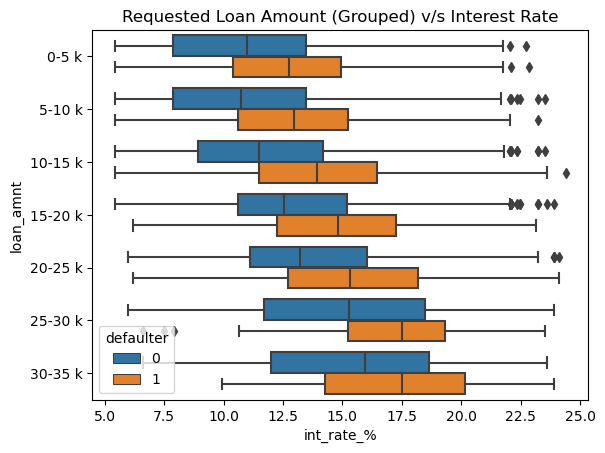

In [609]:
sns.boxplot(x="int_rate_%", y=grouped_loan_amnt_data, data=relevant_data, hue="defaulter")
#sns.set(font_scale=1.5)
plt.title('Requested Loan Amount (Grouped) v/s Interest Rate')
plt.show()

From above, we can infer that chances of default is high when int_rate_% is between 14.5 to 20 & loan_amnt is between 30 to 35 k

#### v/s verification_status

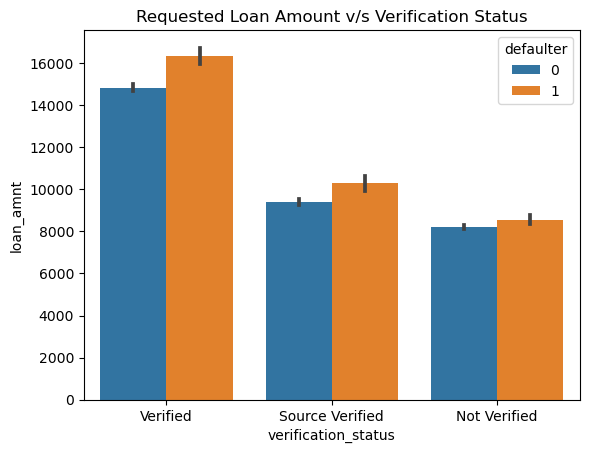

In [612]:
sns.barplot(x='verification_status', y='loan_amnt', data=relevant_data, hue="defaulter")
plt.title('Requested Loan Amount v/s Verification Status')
plt.show()

From above, we can infer that chances of default is high when verification_status='Verified' & loan_amnt > 16,000

#### v/s emp_length

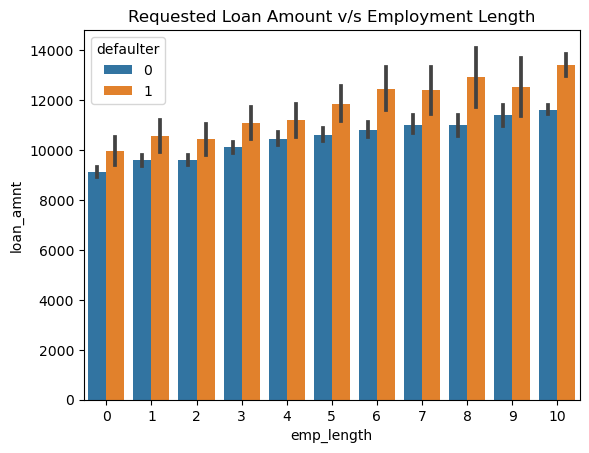

In [613]:
sns.barplot(x='emp_length', y='loan_amnt', data=relevant_data, hue="defaulter")
plt.title('Requested Loan Amount v/s Employment Length')
plt.show()

From above, we can infer that chances of default is high when emp_length = 10 & loan_amnt is b/w 12,000 to 14,000

#### v/s grade

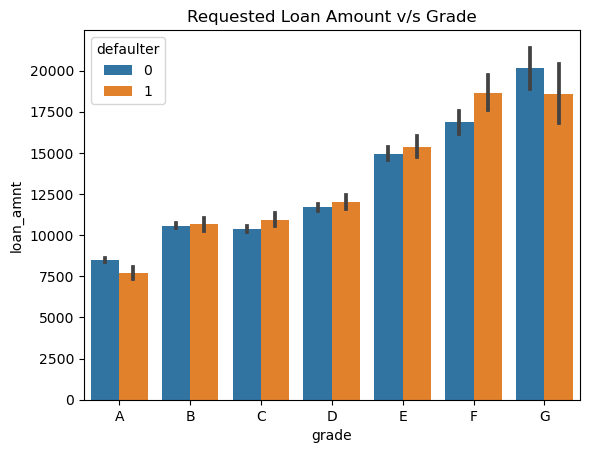

In [614]:
sns.barplot(x='grade', y='loan_amnt', data=relevant_data, hue="defaulter", order=['A','B','C','D','E','F','G'])
plt.title('Requested Loan Amount v/s Grade')
plt.show()

From above, we can infer that chances of default is high when grade is either 'F' or 'G' & loan_amnt is b/w 17,500 to 20,000

#### v/s home_ownership

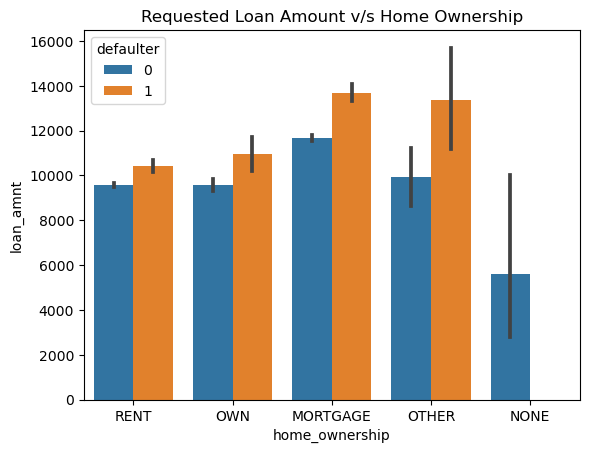

In [615]:
sns.barplot(x='home_ownership', y='loan_amnt', data=relevant_data, hue="defaulter")
plt.title('Requested Loan Amount v/s Home Ownership')
plt.show()

From above, we can infer that chances of default is high when home_ownership is either 'MORTGAGE' or 'OTHER' & loan_amnt is b/w 12,000 to 14,000

#### purpose

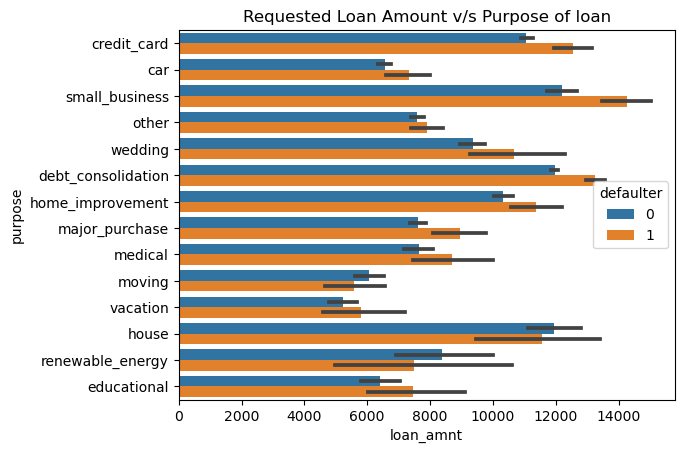

In [616]:
sns.barplot(y='purpose', x='loan_amnt', data=relevant_data, hue="defaulter")
plt.title('Requested Loan Amount v/s Purpose of loan')
plt.show()

From above, we can infer that chances of default is high when purpose is any one of these - credit_card, small_business, debt_consolidation - and loan_amnt is b/w 12,000 to 14,000

### annual_inc v/s others

#### home_ownership

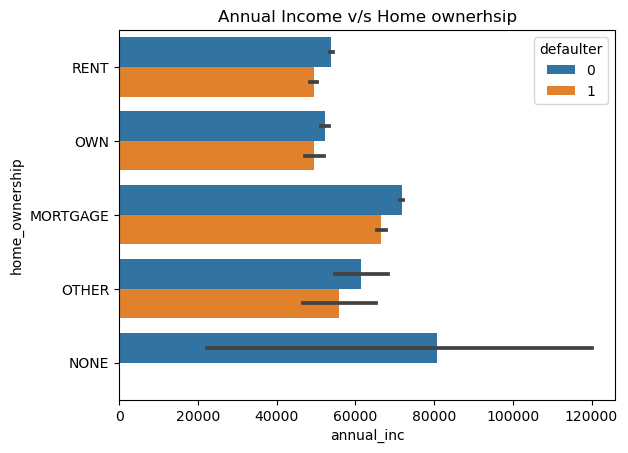

In [617]:
sns.barplot(y='home_ownership', x='annual_inc', data=relevant_data, hue="defaulter")
plt.title('Annual Income v/s Home ownerhsip')
plt.show()

From above, we can infer that chances of default is high when home_ownership is 'MORTGAGE' and annual_inc is b/w Rs 60,000 to 80,000

#### purpose

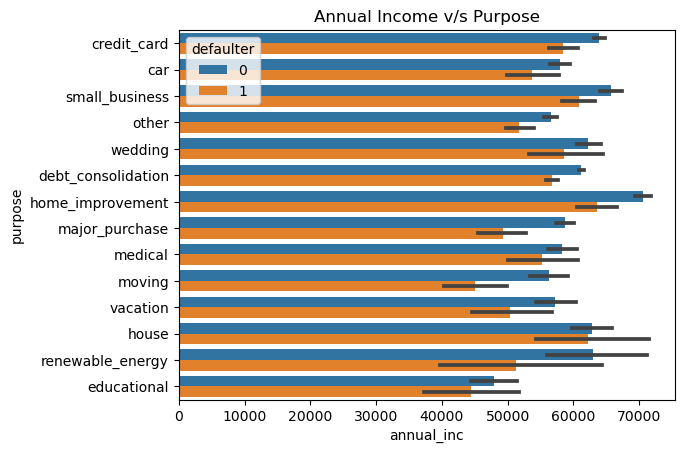

In [618]:
sns.barplot(y='purpose', x='annual_inc', data=relevant_data, hue="defaulter")
plt.title('Annual Income v/s Purpose')
plt.show()

From above, we can infer that chances of default is high when purpose is either 'house' or 'home_improvement' and annual_inc is b/w Rs 60,000 to 70,000

### loan_amnt v/s annual_inc

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

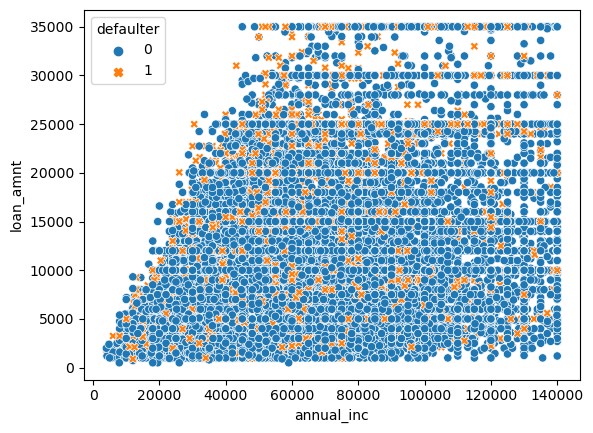

In [563]:
sns.scatterplot(data=relevant_data, x="annual_inc", y="loan_amnt", hue="defaulter", style="defaulter")